In [1]:
using PyPlot
using ClimateMARGO

┌ Info: Precompiling ClimateMARGO [d3f62095-a717-45bf-aadc-ac9dfc258fa6]
└ @ Base loading.jl:1273


In [2]:
using ClimateMARGO.Models
using ClimateMARGO.Diagnostics

## Initialize model

In [21]:
params = ClimateMARGO.IO.load_params("default")
params.domain.dt = 1.
params.domain.final_year = 2100
params.economics.mitigate_init = 0.
params.economics.baseline_emissions = ramp_emissions(params.domain)

model = ClimateModel(params);

In [22]:
ClimateMARGO.Optimization.optimize_controls!(
    model,
    obj_option = "temp",
    temp_goal = model.physics.T0+1.0,
    temp_final = model.physics.T0,
    max_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>1., "adapt"=>0.),
    delay_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>0., "adapt"=>0.),
);

Solve_Succeeded


### Plotting the optimal solution state

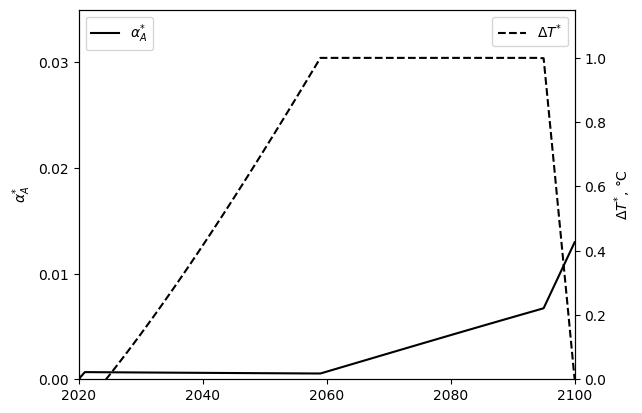

In [23]:
figure(figsize=(4,4))

fig, ax1 = subplots()
S0 = 1361.
ax1.plot(t(model), (model.controls.geoeng*8.5)*4/S0, "k-", label=L"$\alpha_{A}^{*}$")
ax1.set_xlabel("")
ax1.set_ylabel(L"$\alpha_{A}^{*}$")
ax1.set_xticks([2020, 2040, 2060, 2080, 2100])
ax1.set_yticks([0, 0.01, 0.02, 0.03])
ax1.set_xlim([2020, 2100])
ax1.set_ylim([0,0.035])
legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(t(model), T(model, G=true) .- model.physics.T0, "k--", label=L"$\Delta T^{*}$")
ax2.set_ylim([0, 1.15])
ax2.set_ylabel(L"$\Delta T^{*}$, $\degree$C")
ax2.set_xlim([2020, 2100])

legend()
savefig("../../figures/replicate_Soldatenko.pdf", bbox_inches="tight", dpi=150)